## Basic preprocessing (Numerical Features)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML, display
from tqdm import tqdm_notebook as tqdm

display(HTML("<style>.container { width:88% !important; }</style>"))

In [66]:
col_names = {
    "アクセス": "access",
    "キッチン": "kitchen",
    "バス・トイレ": "bathroom",
    "周辺環境": "neighbor",
    "契約期間": "contract",
    "建物構造": "material",
    "所在階": "floor_stories",
    "放送・通信": "internet",
    "方角": "direction",
    "築年数": "age",
    "賃料": "target",
    "間取り": "layout",
    "面積": "area",
    "駐車場": "parking",
    "所在地": "address",
    "室内設備": "equipment",
}

# Read files
INPUT_FILE_PATH = "./../../input"
train_df = pd.read_csv(f"{INPUT_FILE_PATH}/train.csv").rename(columns=col_names)
test_df = pd.read_csv(f"{INPUT_FILE_PATH}/test.csv").rename(columns=col_names)

# Combine train and test dataframes
df = pd.concat([train_df, test_df], axis=0, sort=True)

## target : 賃料

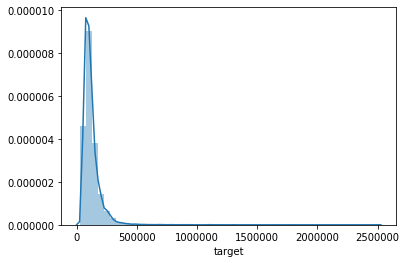

In [3]:
sns.distplot(train_df["target"])

In [4]:
train_df[train_df["target"] > 1000000]

,id,target,address,access,layout,age,direction,area,floor_stories,bathroom,kitchen,internet,equipment,parking,neighbor,material,contract
1501,1502,1200000,東京都港区元麻布３丁目,南北線\t麻布十番駅\t徒歩9分\t\t都営大江戸線\t六本木駅\t徒歩9分\t\t東京メト...,3LDK,18年6ヶ月,南東,163.62m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t57,000円(税込)",NaN,RC（鉄筋コンクリート）,5年間\t※この物件は\t定期借家\tです。
1771,1772,1450000,東京都大田区田園調布３丁目,東急東横線\t田園調布駅\t徒歩5分\t\t東急目黒線\t田園調布駅\t徒歩5分,4LDK+S(納戸),9年1ヶ月,南西,232.01m2,2階建,専用バス／\t専用トイレ／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,エアコン付\tウォークインクローゼット\tフローリング／\t室内洗濯機置場,駐車場\t空有,NaN,木造,4年間\t※この物件は\t定期借家\tです。
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
5775,5776,1203500,東京都港区新橋４丁目,山手線\t新橋駅\t徒歩2分\t\t都営大江戸線\t汐留駅\t徒歩2分,1K,12年5ヶ月,北西,20.53m2,10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 432m\t【スーパー】 570m\t【コンビニ】 43m\t【コンビニ】 2...,RC（鉄筋コンクリート）,2年間
8706,8707,1390000,東京都港区虎ノ門５丁目11-1,日比谷線\t神谷町駅\t徒歩1分\t\t南北線\t六本木一丁目駅\t徒歩10分\t\t都営三...,2LDK,14年10ヶ月,東,138.99m2,7階／24階建,専用バス／\t専用トイレ／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tバルコニー／\t24時間換...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 558m\t【スーパー】 535m\t【コンビニ】 330m\t【コンビニ】 ...,鉄骨造,3年間\t※この物件は\t定期借家\tです。
9008,9009,1300000,東京都港区麻布台３丁目4-24,都営大江戸線\t麻布十番駅\t徒歩7分\t\t南北線\t六本木一丁目駅\t徒歩8分\t\t日...,3LDK+S(納戸),30年5ヶ月,南,223.71m2,3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t洗面台独...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tL字キッチン,NaN,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,駐車場\t空有\t0円\t駐輪場\t空有\tバイク置き場\t空有,【スーパー】 538m\t【コンビニ】 390m\t【コンビニ】 454m\t【スーパー】 ...,木造,3年間\t※この物件は\t定期借家\tです。
11367,11368,1100000,東京都新宿区新宿６丁目,都営大江戸線\t東新宿駅\t徒歩2分\t\t都営新宿線\t新宿三丁目駅\t徒歩10分\t\t...,2LDK,25年1ヶ月,南東,192.43m2,9階／10階建（地下1階）,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／\t洗面台独立／\t脱衣所,ガスコンロ／\tコンロ3口／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tロフト付き／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯機置場...,"駐車場\t空有\t43,200円",【スーパー】 170m\t【スーパー】 502m\t【コンビニ】 14m\t【コンビニ】 1...,SRC（鉄骨鉄筋コンクリート）,2年間
11958,11959,1120000,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩13分\t\t東急東横線\t...,4LDK,22年7ヶ月,南,221.3m2,11階／13階建,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立...,ガスコンロ／\tコンロ4口以上／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tシューズボックス／\tバル...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 729m\t【コンビニ】 177m\t【スーパー】 363m\t【病院】 727m,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
15417,15418,1300000,東京都港区南麻布１丁目16-2,南北線\t麻布十番駅\t徒歩7分\t\t南北線\t白金高輪駅\t徒歩16分\t\t都営大江戸...,2LDK,5年1ヶ月,北,125m2,7階／7階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン／\tL字キッチン,インターネット対応／\t光ファイバー,エアコン付\tウォークインクローゼット\tシューズボックス／\tロフト付き／\tバルコニー／...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 217m\t【スーパー】 541m\t【コンビニ】 256m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
16847,16848,1120000,東京都渋谷区広尾１丁目1-7,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩14分\t\t東急東横線\t...,4LDK,22年7ヶ月,東,221.3m2,11階／13階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,コンロ4口以上／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,"駐車場\t空有\t64,800円\t(※サイズ・空き要確認)",【デパート】 964m\t【スーパー】 752m\t【スーパー】 989m\t【スーパー】 ...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


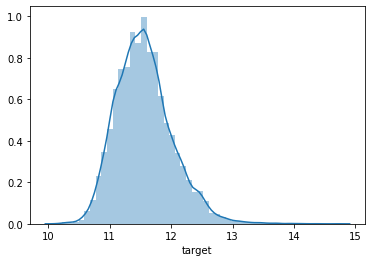

In [5]:
# looks like a log-normal distribution
sns.distplot(np.log(train_df["target"]))

## age : to float value  
ex) \
"3年9ヶ月" -> 3.75 \
"新築" -> 0

In [6]:
df["age"].value_counts()

0年1ヶ月      1885
新築         1739
0年0ヶ月      1375
0年2ヶ月      1273
0年3ヶ月       997
           ... 
73年5ヶ月        1
52年6ヶ月        1
62年9ヶ月        1
60年4ヶ月        1
71年10ヶ月       1
Name: age, Length: 771, dtype: int64

In [53]:
# age : to float value
def pp_age(df):
    age = df["age"]

    age = age.map(lambda x: "0年" if x == "新築" else x)

    y_m = age.str.split("年", expand=True)
    year = y_m.iloc[:, 0].astype(int)
    month = (
        y_m.iloc[:, 1]
        .str.replace("ヶ月", "")
        .map(lambda x: "0" if x == "" else x)
        .astype(int)
    )

    df.loc[:, "age"] = year + month / 12

    df.loc[df["age"] > 70, "age"] = 70
    return df

In [54]:
df = pp_age(df)

In [55]:
df["age"].astype(int).value_counts()

0     10535
11     2455
12     2441
2      2190
13     2159
      ...  
69        5
65        5
68        3
66        3
67        1
Name: age, Length: 71, dtype: int64

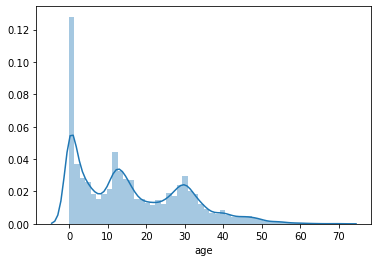

In [56]:
sns.distplot(df["age"])

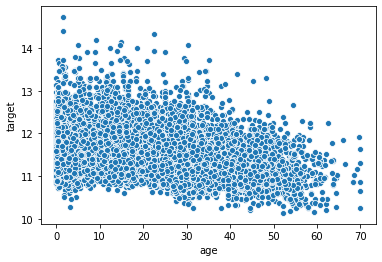

In [57]:
# Little correlation...
sns.scatterplot(x=df["age"], y=np.log(df["target"]))

## area : to float value
ex) \
'64.76m2' -> 64.76

In [58]:
df["area"].value_counts()

20m2        486
18m2        379
40m2        368
21m2        331
30m2        320
           ... 
133.11m2      1
36.58m2       1
20.232m2      1
104.9m2       1
89.2m2        1
Name: area, Length: 6721, dtype: int64

In [67]:
def pp_area(df):
    area = df["area"]
    area = area.str.replace("m2", "")
    area = area.astype(float)

    df.loc[:, "area"] = area
    df.loc[df.area > 200, "area"] = 200
    return df

In [68]:
df = pp_area(df)

In [69]:
df["area"].astype(int).value_counts()

25     6696
20     3145
26     2490
40     2399
21     2314
       ... 
137       1
168       1
199       1
135       1
163       1
Name: area, Length: 177, dtype: int64

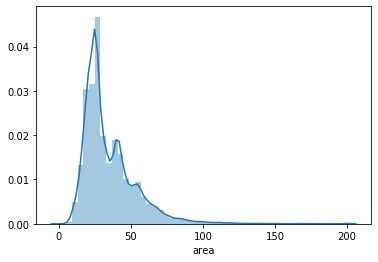

In [70]:
sns.distplot(df["area"])

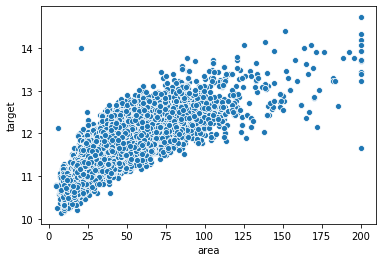

In [71]:
# relation between area and log(target)
# looks good!
sns.scatterplot(x=df["area"], y=np.log(df["target"]))

## floor_stories : floor (int) + stories(int)
ex) \
"12階／13階建" -> { floor: 12, stories: 13 }

In [72]:
df["floor_stories"].value_counts()

2階／2階建            5706
1階／2階建            5519
2階／3階建            4030
3階／3階建            3541
1階／3階建            3325
                  ... 
34階／43階建（地下2階）       1
4階／22階建（地下2階）        1
21階／53階建（地下2階）       1
27階／33階建             1
19階／30階建（地下4階）       1
Name: floor_stories, Length: 1402, dtype: int64

In [73]:
df["floor_stories"][df["floor_stories"].str.split("／", expand=True).iloc[:, 0] == ""]

99             ／3階建
122            ／8階建
583           ／12階建
671      ／3階建（地下1階）
814            ／2階建
            ...    
30529    ／3階建（地下1階）
30781          ／2階建
30826          ／2階建
31073          ／3階建
31184          ／2階建
Name: floor_stories, Length: 233, dtype: object

In [74]:
df[df["floor_stories"].isna()]

,access,address,age,area,bathroom,contract,direction,equipment,floor_stories,id,internet,kitchen,layout,material,neighbor,parking,target
9204,都営新宿線\t船堀駅\t徒歩11分\t\t東西線\t西葛西駅\t徒歩20分\t\t東西線\t...,東京都江戸川区宇喜田町1469-35,0年4ヶ月,94.91,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台...,2年間,南西,バルコニー／\tルーフバルコニー\t／\tフローリング,NaN,40675,NaN,システムキッチン\t／\tL字キッチン,3LDK,鉄骨造,NaN,NaN,NaN


In [77]:
def pp_floor_stories(df):
    floor = df["floor_stories"].str.split("／", expand=True).iloc[:, 0]
    stories = df["floor_stories"].str.split("／", expand=True).iloc[:, 1]

    # "xx階建"のみの場合は1階にする
    floor[floor.str.contains("階建").fillna(False)] = "1"
    floor = floor.str.replace(r"（地下\d階）", "")
    floor = floor.str.replace("地下", "-")
    floor = floor.str.replace("階", "")

    # fill 2 in case of nan
    floor[floor.isna()] = "2"
    floor[floor == ""] = "2"
    floor = floor.astype(int)

    stories = stories.str.replace(r"（地下\d階）", "").str.replace("階建", "")
    stories[(stories == None) | (stories.isna())] = 2
    stories = stories.astype(int)

    df.loc[:, "floor"] = floor
    df.loc[:, "stories"] = stories
    return df

In [79]:
df = pp_floor_stories(df)

In [80]:
# THERE ARE MANY INVALID DATA!!!
df[df["floor"] > df["stories"]][["floor_stories", "floor", "stories", "target"]]

,floor_stories,floor,stories,target
1203,2階／1階建,2,1,110000.0
2611,3階,3,2,100000.0
11488,5階,5,2,176000.0
14238,10階／8階建,10,8,62000.0
20743,7階／2階建,7,2,89000.0
21504,4階／2階建,4,2,103000.0
28317,3階,3,2,161800.0
956,3階／2階建,3,2,NaN
983,2階／1階建,2,1,NaN
3154,13階／4階建（地下1階）,13,4,NaN


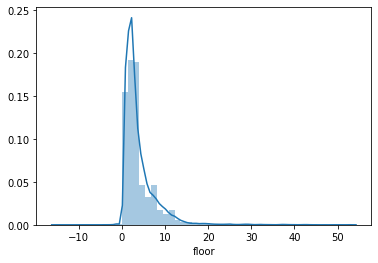

In [81]:
sns.distplot(df["floor"])

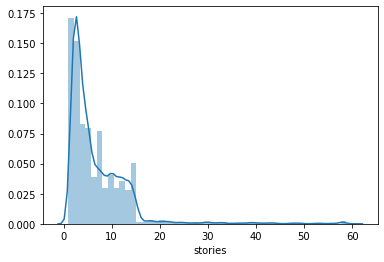

In [82]:
sns.distplot(df["stories"])

In [84]:
floor = df["floor"]
stories = df["stories"]

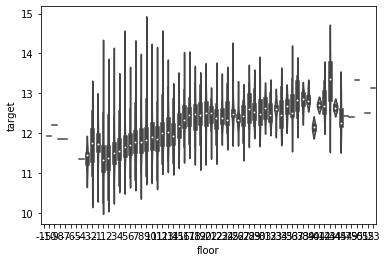

In [85]:
sns.violinplot(x=floor, y=np.log(df["target"]))

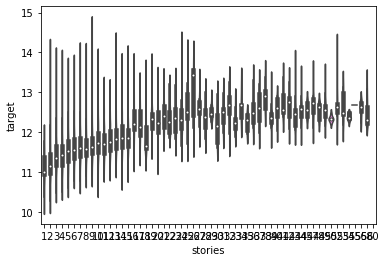

In [86]:
sns.violinplot(x=stories, y=np.log(df["target"]))

## contract : contract, periodic 

In [89]:
def pp_contract(df):
    contract = df["contract"].str.replace("※この物件は\t定期借家\tです。", "").str.replace("\t", "")
    contract[contract.str.contains("まで").fillna(True)] = "2年間"
    year = contract.str.extract(r"(\d)年間").fillna(0).astype(int)
    month = contract.str.extract(r"(\d)ヶ月間").fillna(0).astype(int)
    contract = year + (month / 12)
    contract = contract.iloc[:, 0]

    periodic = df["contract"].str.contains("定期借家").fillna(0).astype(int)

    df.loc[:, "contract"] = contract
    df.loc[:, "periodic"] = periodic

    return df

In [90]:
df = pp_contract(df)

In [91]:
contract = df["contract"]
periodic = df["periodic"]

In [92]:
contract.value_counts()

2.000000    61230
5.000000      516
3.000000      469
1.000000      309
4.000000      124
0.166667       20
6.000000       13
7.000000       13
0.000000       11
0.500000        8
0.750000        4
0.666667        4
0.083333        3
0.583333        3
0.416667        2
0.333333        2
0.250000        1
Name: contract, dtype: int64

In [93]:
periodic.value_counts()

0    59382
1     3350
Name: periodic, dtype: int64

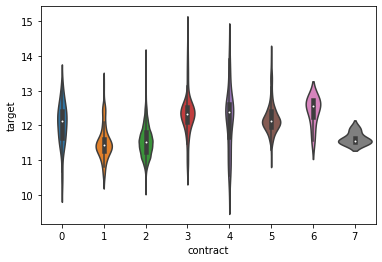

In [94]:
# Little correlation
sns.violinplot(x=contract.astype(int), y=np.log(df["target"]))

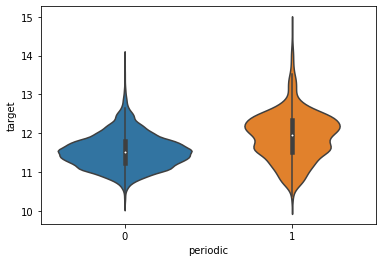

In [95]:
sns.violinplot(x=periodic, y=np.log(df["target"]))